In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

import cirq 
from cirq.contrib.svg import SVGCircuit

from circuits import *
from utils import *

In [2]:
n = 2
t1 = cirq.LineQubit.range(n)
t2 = cirq.LineQubit.range(n, 2*n)
c = cirq.LineQubit.range(2*n, 3*n)
circuit = cirq.Circuit((d4_fiducial(t1, conjugate=True),\
                        d4_fiducial(t2),\
                        AP(t1,t2),\
                        AK(c, t1, t2)),\
                        cirq.measure(*(t1+t2), key="result"),\
                        strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

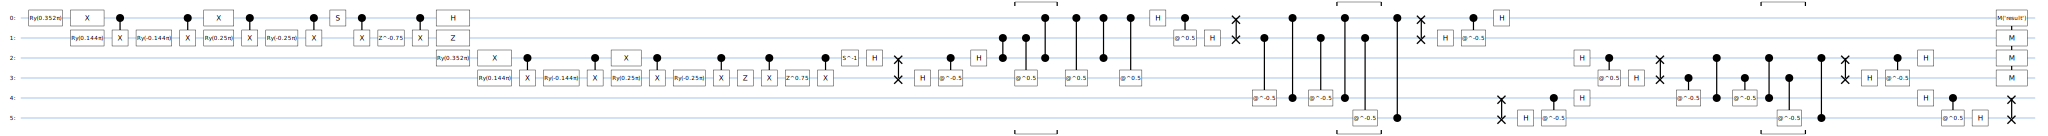

In [3]:
SVGCircuit(circuit)

In [4]:
N = 100000
s = cirq.Simulator()
samples = s.run(circuit, repetitions=N)
counts = samples.histogram(key="result")
freqs =  np.array([v for k, v in sorted(counts.items())])/N
freqs

array([0.143, 0.141, 0.141, 0.141, 0.01 , 0.01 , 0.01 , 0.011, 0.04 ,
       0.04 , 0.041, 0.039, 0.058, 0.058, 0.059, 0.057])

In [5]:
d = 2**n
E = wh_povm(d4_fiducial_ket())
rho0 = np.outer(np.eye(d)[0], np.eye(d)[0]) # The |0,0> state
p = np.array([(e@rho0).trace() for e in E]).real; p

array([0.141, 0.141, 0.141, 0.141, 0.01 , 0.01 , 0.01 , 0.01 , 0.04 ,
       0.04 , 0.04 , 0.04 , 0.059, 0.059, 0.059, 0.059])

## Gate counts

In [8]:
fiducial_circuit = cirq.Circuit((d4_fiducial(t1)))
get_gate_counts(fiducial_circuit)

--- Gate Counts (by type) ---
Ry: 5
_PauliX: 2
CXPowGate: 6
ZPowGate: 3
HPowGate: 1


In [9]:
ancilla_prep_circuit = cirq.Circuit((AP(t1,t2)))
get_gate_counts(ancilla_prep_circuit)

--- Gate Counts (by type) ---
SwapPowGate: 1
HPowGate: 2
CZPowGate: 7


In [11]:
ak_circuit = cirq.Circuit((AK(c, t1, t2)))
get_gate_counts(ak_circuit)

--- Gate Counts (by type) ---
HPowGate: 12
CZPowGate: 18
SwapPowGate: 6


In [12]:
get_gate_counts(circuit)

--- Gate Counts (by type) ---
Ry: 10
_PauliX: 4
CXPowGate: 12
ZPowGate: 6
HPowGate: 16
SwapPowGate: 7
CZPowGate: 25
MeasurementGate: 1


In [14]:
len(circuit.moments)

68